In [43]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Features
-----------------------

SPX: Session P index-->capitalisation index of fortune 500 companies

GLD:gold price

USO: United States oil prices

SLV: Silver prices

EUr/USD: currency pair

# Data Collection and Analysis

In [3]:
#reading data from csv to pandas Dataframe
df= pd.read_csv("gld_price_data.csv")

In [4]:
#checking first 5 rows from the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#checking the number of rows and columns
df.shape

(2290, 6)

In [7]:
#statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#checking the missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<AxesSubplot:xlabel='GLD'>

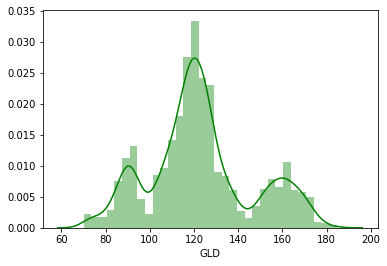

In [9]:
#checking the distribution of the Gold Price
sns.distplot(df['GLD'], color='green')

Most of the data lies within 120 range.

In [10]:
#correlation values of gold
df.corr()['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<AxesSubplot:>

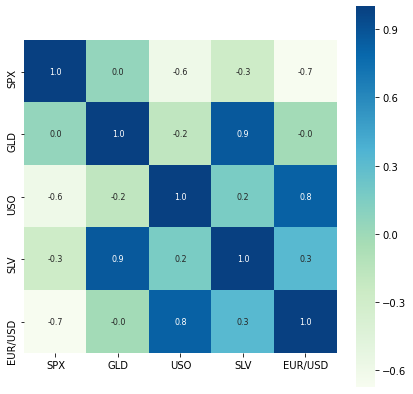

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='GnBu')

From the above correlation diagram, we can see that few columns are positively correlated and few columns are negatively correlated

# Splitting the features and the target

In [12]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting the training data and test data

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

# Model taining

In [39]:
model=RandomForestRegressor(n_estimators=120,random_state=2)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

# Model Evaluation

In [40]:
#prediction on test data
test_data_prediction=model.predict(X_test)

In [41]:
#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R-squared error:",error_score)

R-squared error: 0.9871578143752693


# Compare the actual values and predicted values

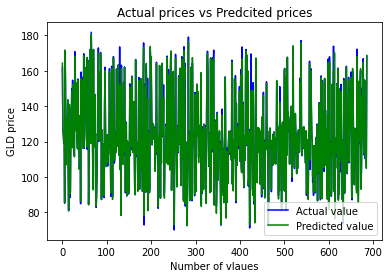

In [42]:
Y_test=list(y_test)
plt.plot(Y_test,color='blue', label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.xlabel("Number of vlaues")
plt.ylabel("GLD price")
plt.title("Actual prices vs Predcited prices")
plt.legend()
plt.show()